In [14]:
#extracting data using pandas 
import pandas as pd

AQ_test=pd.read_excel("AQ.xlsx")
#minimum data returned
AQ_test.head()


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [15]:
AQ_test.shape

(9357, 15)

In [16]:
#plotting the data to consider outliers
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
sns.set(style='whitegrid', context='notebook')
features_plot = ['C6H6(GT)', 'RH', 'AH', 'PT08.S1(CO)']


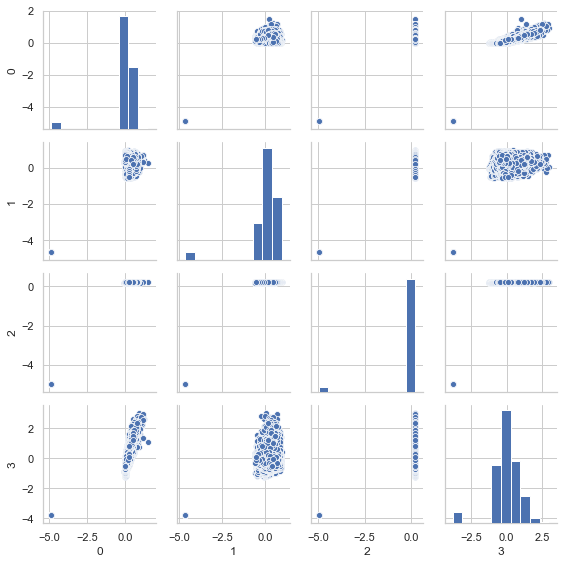

In [17]:
data_to_plot = AQ_test[features_plot]
data_to_plot = scalar.fit_transform(data_to_plot)
data_to_plot = pd.DataFrame(data_to_plot)

sns.pairplot(data_to_plot, height=2.0)
plt.tight_layout()
plt.show()

In [18]:

AQ_test.dropna(axis=0, how='all')
features = AQ_test
features = features.drop('Date', axis=1)
features = features.drop('Time', axis=1)
features = features.drop('C6H6(GT)', axis=1)
features = features.drop('PT08.S4(NO2)', axis=1)
labels = AQ_test['C6H6(GT)'].values
features = features.values

In [19]:
#training the data using cross validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3)
print("X_trian shape --> {}".format(X_train.shape))
print("y_train shape --> {}".format(y_train.shape))
print("X_test shape --> {}".format(X_test.shape))
print("y_test shape --> {}".format(y_test.shape))
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("Predicted values:", regressor.predict(X_test))
print("R^2 score for liner regression: ", regressor.score(X_test, y_test))

X_trian shape --> (6549, 11)
y_train shape --> (6549,)
X_test shape --> (2808, 11)
y_test shape --> (2808,)
Predicted values: [   9.80011904   18.51171853   10.61039259 ...    3.58340398 -199.89316932
    7.13460503]
R^2 score for liner regression:  0.9992450350750951


In [20]:
# letting out abnormalities and checking coefficient of determination
from sklearn.model_selection import KFold
from sklearn.svm import SVR
support_regressor = SVR(kernel='rbf', C=1000)
support_regressor.fit(X_train, y_train)
print("Coefficient of determination R^2 <-- on train set: {}".format(support_regressor.score(X_train, y_train)))
print("Coefficient of determination R^2 <-- on test set: {}".format(support_regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.9999984079656579
Coefficient of determination R^2 <-- on test set: 0.9999973032788023


In [21]:
#estimating using tree based models(classfication of data into features/labels)
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
print("Coefficient of determination R^2 <-- on train set: {}".format(dtr.score(X_train, y_train)))
print("Coefficient of determination R^2 <-- on test set: {}".format(dtr.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 1.0
Coefficient of determination R^2 <-- on test set: 0.9999899088798523


[2.02980112e-04 7.32595009e-02 3.66649620e-06 8.30928495e-02
 5.49244398e-04 5.64602311e-02 8.88956458e-05 3.73246406e-02
 2.35698250e-01 1.96954461e-01 3.16365281e-01]


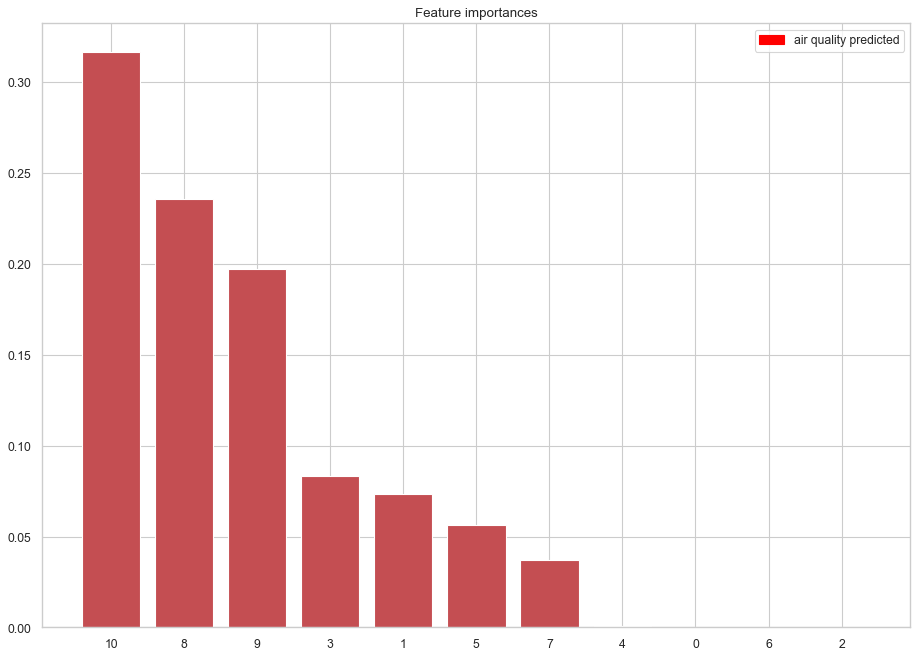

In [22]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

etr = ExtraTreesRegressor(n_estimators=300)
etr.fit(X_train, y_train)
print(etr.feature_importances_)
indecis = np.argsort(etr.feature_importances_)[::-1]
plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w')
red_patch = mpatches.Patch(color='red', label='air quality predicted')
plt.legend(handles=[red_patch])
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), etr.feature_importances_[indecis],
       color="r", align="center")
plt.xticks(range(X_train.shape[1]), indecis)
plt.show()